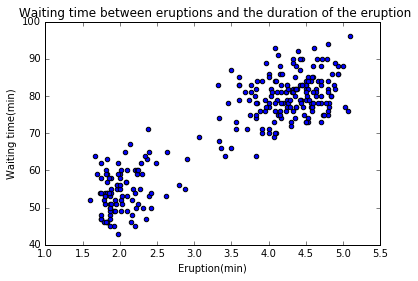

In [1]:
#Problem 2(b)

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

data = np.loadtxt('gmmtest.txt')

x = data[:,1]#eruptions
y = data[:,2]#waiting

plt.figure()
plt.title(" Waiting time between eruptions and the duration of the eruption")
plt.scatter(x,y)
plt.xlabel("Eruption(min)")
plt.ylabel("Waiting time(min)")
#plt.savefig("ori.jpg")





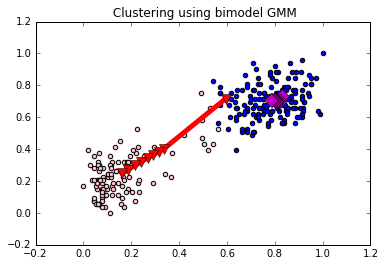

In [21]:
#Problem 2(c)-1

import numpy as np
import matplotlib.pyplot as plt 
import random,math
from sklearn import preprocessing

%matplotlib inline
# Num of Clusters K=2

def gmm(X,K):
    # Num of data points N=271, Dimension D=2
    N, D = np.shape(X)
    
    #init centriods: K*D,2*2
    ctd_index = random.sample(range(272),2) 
    ctd = X[ctd_index] #pick K centriods randomly
    mean_vec1 = []
    mean_vec2 = []
    
    mean_vec1.append(ctd[0])
    mean_vec2.append(ctd[1])

    #Take initial guesses for μ1ˆ , sigma1ˆ 2, μ2ˆ , sigma2ˆ2, pieˆ 
    [pMiu,pPi,pSigma] = init_params(X,ctd,K,N,D)
    
    #set convergence threshold
    threshold  = 1e-15
    #previous log likelihood = -infinite
    Lprev = -np.inf
    
    while True:
        #------------------E-STEP compute responsibilities----------------------------
        
        #calculate Gaussian posterior probability of each component for each data point
        Px = calc_prob(pMiu,pSigma,X,K,N,D)
        #numerator = pi(k) * N(xi | pMiu(k), pSigma(k)) 
        pGamma = Px * np.tile(pPi,(N,1))
        #denominator= SUM(pi(j) * N(xi | pMiu(j), pSigma(j)))
        pGamma = pGamma / np.tile((np.sum(pGamma,axis=1)),(K,1)).T
        
        #------------------M-STEP update weighted means and variances----------------------------
        Nk = np.sum(pGamma,axis=0)
        #update pMiu
        pMiu = np.dot(np.dot(np.diag(1 / Nk),pGamma.T),X)
        mean_vec1.append(pMiu[0])
        mean_vec2.append(pMiu[1])
        
        #update pPi
        pPi = Nk / N
        #update pSigma
        for kk in range(K):
            Xshift = X - np.tile(pMiu[kk],(N,1))
            pSigma[:,:,kk] = (np.dot(np.dot(Xshift.T,np.diag(pGamma[:,kk])),Xshift)) / Nk[kk]
        
        #------------------CHECK FOR CONVERGENCE----------------------------
        L = np.sum(np.log(Px*(pPi.T)))  
        if L-Lprev < threshold:
            break        
        Lprev = L
        
    return Px, mean_vec1, mean_vec2
        
    
def init_params(X,ctd,K,N,D):
    pMiu = ctd;#2*2
    pPi = np.zeros([1, K]) #1*K, the weight of K components  
    pSigma = np.zeros([D, D, K]) #D*D*K, the cov matrix of k components
    
    #hard assign x to each centroids 
    # dist:(X - pMiu)^2 = X^2 + pMiu^2 - 2*X*pMiu
    distmat = np.tile(np.sum(X * X,axis=1),(K,1)).T \
    + np.tile(np.sum(pMiu * pMiu,axis = 1).T,(N,1)) \
    - 2 * np.dot(X,pMiu.T)
    
    labels = np.argmin(distmat,axis=1)#label =  row index
    
    for k in range(K):
        Xk = X[labels==k]
        pPi[0][k] = float(np.shape(Xk)[0]) / N # (num of samples in component k) / N
        pSigma[:,:,k] = np.cov(Xk.T)
    
    return pMiu,pPi,pSigma

    
def calc_prob(pMiu,pSigma,X,K,N,D):
    # Gaussian posterior probability   
    # N(x|pMiu,pSigma) = 1/((2pi)^(D/2))*(1/(abs(sigma))^0.5)*exp(-1/2*(x-pMiu)'pSigma^(-1)*(x-pMiu))
    Px = np.zeros((N,K))
    for k in range(K):
        Xshift = X - np.tile(pMiu[k],(N,1))#X-pMiu
        inv_pSigma = np.linalg.pinv(pSigma[:,:,k]) 
        tmp = np.sum(np.dot(Xshift,inv_pSigma) * Xshift,axis=1)
        coef = (2*np.pi)**(-D/2) * np.sqrt(np.linalg.det(inv_pSigma))
        Px[:,k] = coef * np.exp(-0.5 * tmp)
    return Px


if __name__ == '__main__':
    data = np.loadtxt('gmmtest.txt')
    X = data[:,[1,2]] #discard data id
    scaler = preprocessing.MinMaxScaler()
    X = scaler.fit_transform(X) #data normalization-->range[0,1]
    
    esti_px, m_vec1, m_vec2 = gmm(X,2) #fit GMM
    index = np.argmax(esti_px,axis=1) 
    
    #plot the dataset after clustering
    plt.figure(1)
    plt.scatter(X[index==0][:,0],X[index==0][:,1],c='pink')
    plt.scatter(X[index==1][:,0],X[index==1][:,1],c=u'b')
    
    #plot the trajectories of two mean vectors
    plt.plot(np.mat(m_vec1)[:,0],np.mat(m_vec1)[:,1],'rv-',markersize=10,linewidth=5)
    plt.plot(np.mat(m_vec2)[:,0],np.mat(m_vec2)[:,1],'mD-',markersize=10,linewidth=5)
    
    plt.title(" Clustering using bimodel GMM")
    #plt.savefig("gmm.jpg")
    
    
    

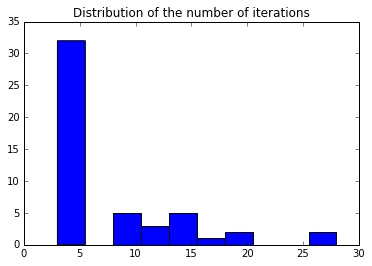

In [5]:
#Problem 2(c)-2

import numpy as np
import matplotlib.pyplot as plt 
import random,math
from sklearn import preprocessing

%matplotlib inline

# Num of Clusters K=2

def gmm(X,K):
    # Num of data points N=271, Dimension D=2
    N, D = np.shape(X)
    
    #init centriods: K*D,2*2
    ctd_index = random.sample(range(271),2) 
    ctd = X[ctd_index] #pick K centriods randomly
    mean_vec1 = []
    mean_vec2 = []
    
    mean_vec1.append(ctd[0])
    mean_vec2.append(ctd[1])
    
    #Take initial guesses for μ1ˆ , sigma1ˆ 2, μ2ˆ , sigma2ˆ2, pieˆ 
    [pMiu,pPi,pSigma] = init_params(X,ctd,K,N,D)
    
    #set convergence threshold
    threshold  = 1e-15
    #previous log likelihood = -infinite
    Lprev = -np.inf
    
    while True:
        #------------------E-STEP compute responsibilities----------------------------
        
        #calculate Gaussian posterior probability of each component for each data point
        Px = calc_prob(pMiu,pSigma,X,K,N,D)
        #numerator = pi(k) * N(xi | pMiu(k), pSigma(k)) 
        pGamma = Px * np.tile(pPi,(N,1))
        #denominator= SUM(pi(j) * N(xi | pMiu(j), pSigma(j)))
        pGamma = pGamma / np.tile((np.sum(pGamma,axis=1)),(K,1)).T
        
        #------------------M-STEP update weighted means and variances----------------------------
        Nk = np.sum(pGamma,axis=0)
        #update pMiu
        pMiu = np.dot(np.dot(np.diag(1 / Nk),pGamma.T),X)
        mean_vec1.append(pMiu[0])
        mean_vec2.append(pMiu[1])
        
        #update pPi
        pPi = Nk / N
        #update pSigma
        for kk in range(K):
            Xshift = X - np.tile(pMiu[kk],(N,1))
            pSigma[:,:,kk] = (np.dot(np.dot(Xshift.T,np.diag(pGamma[:,kk])),Xshift)) / Nk[kk]
        
        #------------------CHECK FOR CONVERGENCE----------------------------
        L = np.sum(np.log(Px*(pPi.T)))  
        if L-Lprev < threshold:
            break        
        Lprev = L
        
    return Px, mean_vec1, mean_vec2
        
    
def init_params(X,ctd,K,N,D):
    pMiu = ctd;#2*2
    pPi = np.zeros([1, K]) #1*K, the weight of K components  
    pSigma = np.zeros([D, D, K]) #D*D*K, the cov matrix of k components
    
    #hard assign x to each centroids 
    # dist:(X - pMiu)^2 = X^2 + pMiu^2 - 2*X*pMiu
    distmat = np.tile(np.sum(X * X,axis=1),(K,1)).T \
    + np.tile(np.sum(pMiu * pMiu,axis = 1).T,(N,1)) \
    - 2 * np.dot(X,pMiu.T)
    
    labels = np.argmin(distmat,axis=1)#label =  row index
    
    for k in range(K):
        Xk = X[labels==k]
        pPi[0][k] = float(np.shape(Xk)[0]) / N # (num of samples in component k) / N
        pSigma[:,:,k] = np.cov(Xk.T)
    
    return pMiu,pPi,pSigma

    
def calc_prob(pMiu,pSigma,X,K,N,D):
    # Gaussian posterior probability   
    # N(x|pMiu,pSigma) = 1/((2pi)^(D/2))*(1/(abs(sigma))^0.5)*exp(-1/2*(x-pMiu)'pSigma^(-1)*(x-pMiu))
    Px = np.zeros((N,K))
    for k in range(K):
        Xshift = X - np.tile(pMiu[k],(N,1))#X-pMiu
        inv_pSigma = np.linalg.pinv(pSigma[:,:,k]) 
        tmp = np.sum(np.dot(Xshift,inv_pSigma) * Xshift,axis=1)
        coef = (2*np.pi)**(-D/2) * np.sqrt(np.linalg.det(inv_pSigma))
        Px[:,k] = coef * np.exp(-0.5 * tmp)
    return Px


if __name__ == '__main__':
    data = np.loadtxt('gmmtest.txt')
    X = data[:,[1,2]]
    scaler = preprocessing.MinMaxScaler()
    X = scaler.fit_transform(X) #data normalization-->range[0,1]
    
    num_it = []
    for i in range(50):
        esti_px, m_vec1, m_vec2 = gmm(X,2)
        num_it.append(np.mat(m_vec1).shape[0])
  
    plt.title("Distribution of the number of iterations")
    plt.hist(num_it)
    #plt.savefig("iteration.jpg")
    

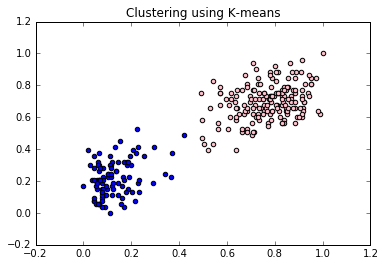

In [9]:
#Problem 2(d)-1

import numpy as np
import matplotlib.pyplot as plt 
import random,math
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

if __name__ == '__main__':
    data = np.loadtxt('gmmtest.txt')
    X = data[:,[1,2]]
    scaler = preprocessing.MinMaxScaler()
    X = scaler.fit_transform(X) #data normalization-->range[0,1]
    
    y_pred = KMeans(n_clusters=2, random_state=150).fit_predict(X)
    plt.figure(1)
    plt.scatter(X[y_pred==0][:,0],X[y_pred==0][:,1],c='pink')
    plt.scatter(X[y_pred==1][:,0],X[y_pred==1][:,1],c=u'b')
    plt.title("Clustering using K-means")
    #plt.savefig("km.jpg")




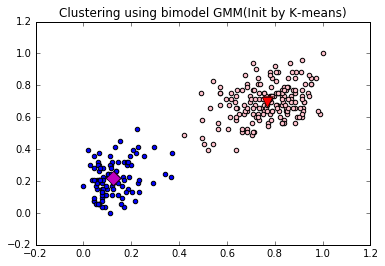

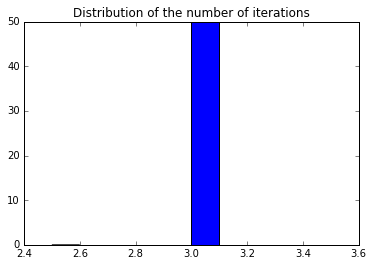

In [24]:
#Problem 2(d)-2
import numpy as np
import matplotlib.pyplot as plt 
import random,math
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

def init_params_kmeans(X,y_pred,K,N,D):
    pMiu = np.zeros([K, 2])
    pPi = np.zeros([1, K]) #1*K, the weight of K components  
    pSigma = np.zeros([D, D, K]) #D*D*K, the cov matrix of k components
    
    for k in range(K):
        Xk = X[y_pred==k]     
        pMiu[k,:] = np.mean(X[y_pred==k],axis=0)
        pPi[0][k] = float(np.shape(Xk)[0]) / N # (num of samples in component k) / N
        pSigma[:,:,k] = np.cov(Xk.T)
        
    return pMiu,pPi,pSigma

    
def calc_prob(pMiu,pSigma,X,K,N,D):
    # Gaussian posterior probability   
    # N(x|pMiu,pSigma) = 1/((2pi)^(D/2))*(1/(abs(sigma))^0.5)*exp(-1/2*(x-pMiu)'pSigma^(-1)*(x-pMiu))
    Px = np.zeros((N,K))
    for k in range(K):
        Xshift = X - np.tile(pMiu[k],(N,1))#X-pMiu
        inv_pSigma = np.linalg.pinv(pSigma[:,:,k]) 
        tmp = np.sum(np.dot(Xshift,inv_pSigma) * Xshift,axis=1)
        coef = (2*np.pi)**(-D/2) * np.sqrt(np.linalg.det(inv_pSigma))
        Px[:,k] = coef * np.exp(-0.5 * tmp)
    return Px

   
def gmm(X,K):
    # Num of data points N=271, Dimension D=2
    N, D = np.shape(X)
    
    #Take initial guesses for μ1ˆ , sigma1ˆ 2, μ2ˆ , sigma2ˆ2, pieˆ 
    #[pMiu,pPi,pSigma] = init_params(X,ctd,K,N,D)
    y_pred = KMeans(n_clusters=K, random_state=150).fit_predict(X)  
    [pMiu,pPi,pSigma] = init_params_kmeans(X,y_pred,K,N,D)
      
    mean_vec1 = []
    mean_vec2 = []
    
    mean_vec1.append(pMiu[0])
    mean_vec2.append(pMiu[1])
    
    #set convergence threshold
    threshold  = 1e-15
    #previous log likelihood = -infinite
    Lprev = -np.inf
    
    while True:
        #------------------E-STEP compute responsibilities----------------------------
        
        #calculate Gaussian posterior probability of each component for each data point
        Px = calc_prob(pMiu,pSigma,X,K,N,D)
        #numerator = pi(k) * N(xi | pMiu(k), pSigma(k)) 
        pGamma = Px * np.tile(pPi,(N,1))
        #denominator= SUM(pi(j) * N(xi | pMiu(j), pSigma(j)))
        pGamma = pGamma / np.tile((np.sum(pGamma,axis=1)),(K,1)).T
        
        #------------------M-STEP update weighted means and variances----------------------------
        Nk = np.sum(pGamma,axis=0)
        #update pMiu
        pMiu = np.dot(np.dot(np.diag(1 / Nk),pGamma.T),X)
        mean_vec1.append(pMiu[0])
        mean_vec2.append(pMiu[1])
        
        #update pPi
        pPi = Nk / N
        #update pSigma
        for kk in range(K):
            Xshift = X - np.tile(pMiu[kk],(N,1))
            pSigma[:,:,kk] = (np.dot(np.dot(Xshift.T,np.diag(pGamma[:,kk])),Xshift)) / Nk[kk]
        
        #------------------CHECK FOR CONVERGENCE----------------------------
        L = np.sum(np.log(Px*(pPi.T)))  
        if L-Lprev < threshold:
            break        
        Lprev = L
        
    return Px, mean_vec1, mean_vec2


if __name__ == '__main__':
    data = np.loadtxt('gmmtest.txt')
    X = data[:,[1,2]]
    N, D = np.shape(X)
    scaler = preprocessing.MinMaxScaler()
    X = scaler.fit_transform(X) #data normalization-->range[0,1]
    
    esti_px, m_vec1, m_vec2 = gmm(X,2)
    index = np.argmax(esti_px,axis=1)
    plt.figure(1)
    plt.scatter(X[index==0][:,0],X[index==0][:,1],c='pink')
    plt.scatter(X[index==1][:,0],X[index==1][:,1],c=u'b')   
    plt.title("Clustering using bimodel GMM(Init by K-means)")
     
    #plot the trajectories of two mean vectors
    plt.plot(np.mat(m_vec1)[:,0],np.mat(m_vec1)[:,1],'rv-',markersize=10,linewidth=5)
    plt.plot(np.mat(m_vec2)[:,0],np.mat(m_vec2)[:,1],'mD-',markersize=10,linewidth=5)   
    #plt.savefig("gmm-km.jpg")
     
    num_it = []   
    for i in range(50):
        esti_px, m_vec1, m_vec2 = gmm(X,2)
        num_it.append(np.mat(m_vec1).shape[0])
    #print(num_it)
  
    plt.figure(2)
    plt.title("Distribution of the number of iterations")
    plt.hist(num_it)
    #plt.savefig("it-gmm-km.jpg")
